In [1]:
from scipy.stats import boxcox, kurtosis, skew
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/home/karvsmech/Projects/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True
pd.options.mode.chained_assignment = None    

/home/karvsmech/Projects/kaggle/input/house_prices_prediction/data_description.txt
/home/karvsmech/Projects/kaggle/input/house_prices_prediction/top-1-w-leakage-ensemble-w-catboost.ipynb
/home/karvsmech/Projects/kaggle/input/house_prices_prediction/test.csv
/home/karvsmech/Projects/kaggle/input/house_prices_prediction/train.csv
/home/karvsmech/Projects/kaggle/input/house_prices_prediction/sample_submission.csv


In [2]:
df = pd.read_csv('/home/karvsmech/Projects/kaggle/input/house_prices_prediction/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dtypes = df.dtypes.to_frame().reset_index()
dtypes.columns = ['col', 'dtype']
dtypes.groupby('dtype').size()

dtype
int64      35
float64     3
object     43
dtype: int64

In [4]:
def na(df, percent=True, verbose=True):
    na_series = df.isna().sum()
    na_series = na_series.where(na_series > 0).dropna().sort_values(ascending=False)
    if percent:
        if verbose:
            print("% of NaNs in each column")
        return (na_series/df.shape[0]) * 100
    else:
        if verbose:
            print("# of NaNs in each column:")
        return na_series
    
na(df, False)

# of NaNs in each column:


PoolQC         1,453.00
MiscFeature    1,406.00
Alley          1,369.00
Fence          1,179.00
MasVnrType       872.00
FireplaceQu      690.00
LotFrontage      259.00
GarageType        81.00
GarageYrBlt       81.00
GarageFinish      81.00
GarageQual        81.00
GarageCond        81.00
BsmtFinType2      38.00
BsmtExposure      38.00
BsmtFinType1      37.00
BsmtCond          37.00
BsmtQual          37.00
MasVnrArea         8.00
Electrical         1.00
dtype: float64

<Axes: >

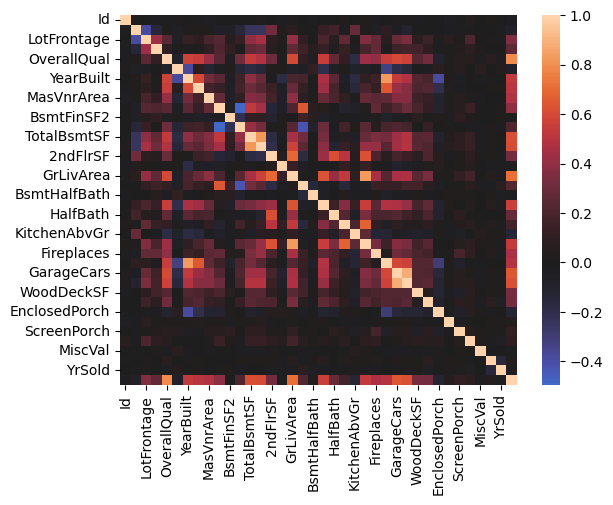

In [5]:
sns.heatmap(df.select_dtypes(exclude='O').corr(), center=0)

In [6]:
def get_corr_list(df, threshold = 0.6):
    df_corr = df[num_vars].corr().unstack().to_frame().reset_index()
    df_corr.columns = ['var1', 'var2', 'corr']

    # removing rows where var1 is equal to var2
    df_corr = df_corr.loc[df_corr['var1'] != df_corr['var2'], :]
    df_corr['abs_corr'] = df_corr['corr'].abs()
    df_corr = df_corr.loc[df_corr['abs_corr'] > threshold, :]
    df_corr.sort_values(by=['abs_corr'], ascending=False, inplace=True)

    #remove mirrored items
    df_corr = df_corr.iloc[::2]
    
    return df_corr.reset_index()
    
    
num_vars = df.select_dtypes(include='number').columns.tolist()
df_corr = get_corr_list(df[num_vars])
df_corr

,index,var1,var2,corr,abs_corr
0,1015,GarageCars,GarageArea,0.88,0.88
1,956,GarageYrBlt,YearBuilt,0.83,0.83
2,631,GrLivArea,TotRmsAbvGrd,0.83,0.83
3,469,TotalBsmtSF,1stFlrSF,0.82,0.82
4,189,OverallQual,SalePrice,0.79,0.79
5,645,GrLivArea,SalePrice,0.71,0.71
6,548,2ndFlrSF,GrLivArea,0.69,0.69
7,821,BedroomAbvGr,TotRmsAbvGrd,0.68,0.68
8,655,BsmtFullBath,BsmtFinSF1,0.65,0.65
9,957,GarageYrBlt,YearRemodAdd,0.64,0.64


In [7]:
__neighborhood = df.groupby('Neighborhood').agg({'Neighborhood':'size', 'SalePrice':'mean'})
__neighborhood.sort_values('SalePrice')

,Neighborhood,SalePrice
Neighborhood,,
MeadowV,17,"98,576.47"
IDOTRR,37,"100,123.78"
BrDale,16,"104,493.75"
BrkSide,58,"124,834.05"
Edwards,100,"128,219.70"
OldTown,113,"128,225.30"
Sawyer,74,"136,793.14"
Blueste,2,"137,500.00"
SWISU,25,"142,591.36"


In [8]:
__condition1 = df.groupby('Condition1').agg({'Condition1':'size', 'SalePrice':'mean'})
__condition1.sort_values('SalePrice')

,Condition1,SalePrice
Condition1,,
Artery,48,"135,091.67"
RRAe,11,"138,400.00"
Feedr,81,"142,475.48"
RRAn,26,"184,396.62"
Norm,1260,"184,495.49"
RRNe,2,"190,750.00"
RRNn,5,"212,400.00"
PosN,19,"215,184.21"
PosA,8,"225,875.00"


In [9]:
__condition2 = df.groupby('Condition2').agg({'Condition2':'size', 'SalePrice':'mean'})
__condition2.sort_values('SalePrice')

,Condition2,SalePrice
Condition2,,
RRNn,2,"96,750.00"
Artery,2,"106,500.00"
Feedr,6,"121,166.67"
RRAn,1,"136,905.00"
Norm,1445,"181,169.41"
RRAe,1,"190,000.00"
PosN,2,"284,875.00"
PosA,1,"325,000.00"


In [10]:
cat_cols = df.select_dtypes('O').columns.to_list() + ['MSSubClass']
cat_cols = [col for col in cat_cols if col not in ['Neighborhood', 'Condition1', 'Condition2', 'FireplaceQu']]
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


In [11]:
# OneHotEncoder
ohencoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohencoder.set_output(transform='pandas')

# one hot encoder treats nan as a separate category.
df_cats_encoded = ohencoder.fit_transform(df[cat_cols])
df_cats_encoded

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.

In [12]:
# dropping all the categorical variable that has been "one hot encoded"
df = pd.concat([df.drop(cat_cols, axis=1), df_cats_encoded], axis=1)
df

,Id,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_nan,LotShape_IR2,LotShape_IR3,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,65.00,8450,CollgCr,Norm,Norm,7,5,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,NaN,"2,003.00",2,548,0,61,0,0,0,0,0,2,2008,208500,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,80.00,9600,Veenker,Feedr,Norm,6,8,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,TA,"1,976.00",2,460,298,0,0,0,0,0,0,5,2007,181500,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,68.00,11250,CollgCr,Norm,Norm,7,5,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,TA,"2,001.00",2,608,0,42,0,0,0,0,0,9,2008,223500,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,60.00,9550,Crawfor,Norm,Norm,7,5,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,Gd,"1,998.00",3,642,0,35,272,0,0,0,0,2,2006,140000,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,84.00,14260,NoRidge,Norm,Norm,8,5,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,TA,"2,000.00",3,836,192,84,0,0,0,0,0,12,2008,250000,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.00,7917,Gilbert,Norm,Norm,6,5,1999,2000,0.00,0,0,953,953

In [13]:
# Handling missing values.
na(df, False)

# of NaNs in each column:


FireplaceQu   690.00
LotFrontage   259.00
GarageYrBlt    81.00
MasVnrArea      8.00
dtype: float64

In [14]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [15]:
na(df, False)

# of NaNs in each column:


FireplaceQu   690.00
GarageYrBlt    81.00
dtype: float64

In [16]:
df.select_dtypes(exclude='O').corr()['GarageYrBlt'].sort_values(ascending=False)

GarageYrBlt        1.00
YearBuilt          0.83
Foundation_PConc   0.66
YearRemodAdd       0.64
GarageCars         0.59
                   ... 
ExterCond_Po        NaN
GarageType_nan      NaN
GarageFinish_nan    NaN
GarageQual_nan      NaN
GarageCond_nan      NaN
Name: GarageYrBlt, Length: 231, dtype: float64

In [17]:
df.loc[df['GarageYrBlt'].isna(), 'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isna(), 'YearBuilt']

In [18]:
na(df, False)

# of NaNs in each column:


FireplaceQu   690.00
dtype: float64

In [19]:
# Handling Outliers

df.select_dtypes(exclude='O').corr()['SalePrice'].sort_values(ascending=False)

SalePrice           1.00
OverallQual         0.79
GrLivArea           0.71
GarageCars          0.64
GarageArea          0.62
                    ... 
MasVnrType_nan     -0.37
GarageFinish_Unf   -0.41
BsmtQual_TA        -0.45
KitchenQual_TA     -0.52
ExterQual_TA       -0.59
Name: SalePrice, Length: 231, dtype: float64

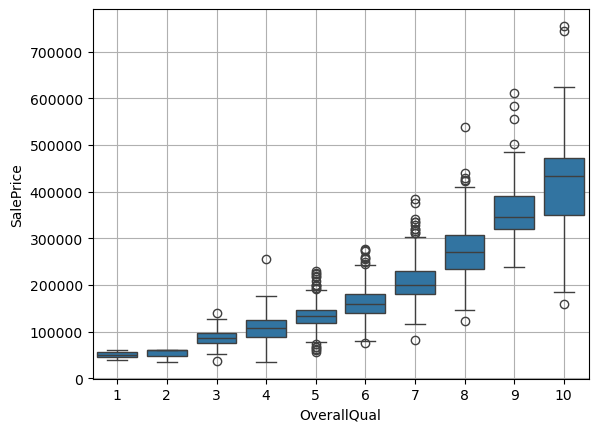

In [20]:
sns.boxplot(df, y='SalePrice', x='OverallQual')
plt.grid()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

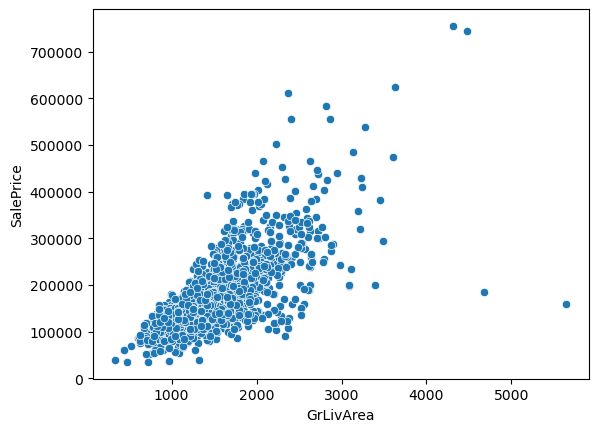

In [21]:
sns.scatterplot(df, y='SalePrice', x='GrLivArea')

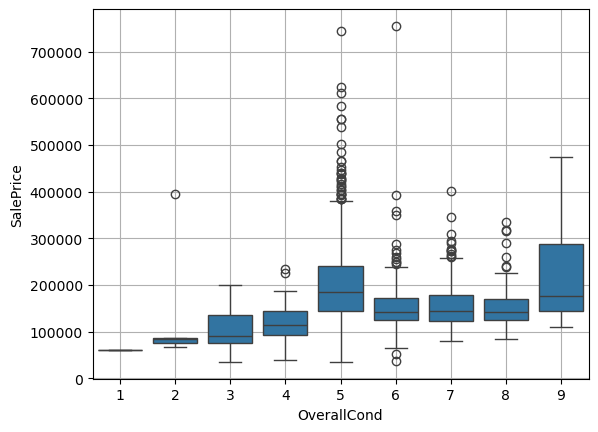

In [22]:
sns.boxplot(df, y='SalePrice', x='OverallCond')
plt.grid()

In [23]:
# all outliers

outliers = pd.concat([
    df[(df['OverallQual'] == 4) & (df['SalePrice'] > 2e5)],
    df[(df['OverallQual'] == 8) & (df['SalePrice'] > 5e5)],
    df[(df['OverallQual'] == 10) & (df['SalePrice'] > 7e5)],
    df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 3e5)],
    df[(df['OverallCond'] == 2) & (df['SalePrice'] > 3e5)],
    df[(df['OverallCond'] == 6) & (df['SalePrice'] > 7e5)]
    ]).sort_index().drop_duplicates()

outliers

,Id,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_nan,LotShape_IR2,LotShape_IR3,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
378,379,88.00,11394,StoneBr,Norm,Norm,9,2,2010,2010,350.00,1445,0,411,1856,1856,0,0,1856,1,0,1,1,1,1,8,1,Ex,"2,010.00",3,834,113,0,0,0,0,0,0,6,2010,394432,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
457,458,0.00,53227,ClearCr,Norm,Norm,4,6,1954,1994,0.00,1116,0,248,1364,1663,0,0,1663,1,0,1,0,2,1,6,2,Gd,"1,954.00",2,529,224,137,0,0,0,0,0,3,2008,256000,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
523,524,130.00,40094,Edwards,PosN,PosN,10,5,2007,2008,762.00,2260,0,878,3138,3138,1538,0,4676,1,0,3,1,3,1,11,1,Gd,"2,007.00",3,884,208,406,0,0,0,0,0,10,2007,184750,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
691,692,104.00,21535,NoRidge,Norm,Norm,10,6,1994,1995,"1,170.00",1455,0,989,2444,2444,1872,0,4316,0,1,3,1,4,1,10,2,Ex,"1,994.00",3,832,382,50,0,0,0,0,0,1,2007,755000,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
769,770,47.00,53504,StoneBr,Norm,Norm,8,5,2003,2003,603.00,1416,0,234,1650,1690,1589,0,3279,1,0,3,1,4,1,12,1,Gd,"2,003.00",3,841,503,36,0,0,210,0,0,6,2010,538000,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1182,1183,160.00,15623,NoRidge,Norm,Norm,10,5,1996,1996,0.00,2096,0,300,2396,2411,2065,0,4476,1,0,3,1,4,1,10,2,TA,"1,996.00",3,813,171,78,0,0,0,555,0,7,2007,745000,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.

In [24]:
df = df.drop(outliers.index)
df.shape

(1453, 235)

In [25]:
na(df, False)

# of NaNs in each column:


FireplaceQu   690.00
dtype: float64

In [26]:
# Power transformation - skew, kurtosis, Box Cox

skew_kurtosis_data = []
for col in df.select_dtypes(include='number').columns:
    srs = df[col].dropna()
    ln_srs = np.log1p(srs)
    skew_kurtosis_data.append({
        'name':col,
        'normal_skew':skew(srs),
        'ln_skew':skew(ln_srs),
        'normal_kurtosis':kurtosis(srs),
        'ln_kurtosis':kurtosis(ln_srs)
    })

skew_kurtosis_data

[{'name': 'Id',
  'normal_skew': -0.0009322173984965627,
  'ln_skew': -1.7884424511033952,
  'normal_kurtosis': -1.2016000461574077,
  'ln_kurtosis': 4.026652357203108},
 {'name': 'LotFrontage',
  'normal_skew': -0.0049672288777894025,
  'ln_skew': -1.554368654274307,
  'normal_kurtosis': 1.9619351014490416,
  'ln_kurtosis': 0.6176052188984049},
 {'name': 'LotArea',
  'normal_skew': 12.970147233575807,
  'ln_skew': -0.227771700755456,
  'normal_kurtosis': 224.12683141729357,
  'ln_kurtosis': 4.7942543700523395},
 {'name': 'OverallQual',
  'normal_skew': 0.18321681349066565,
  'ln_skew': -0.6197486578662844,
  'normal_kurtosis': 0.05846244379796728,
  'ln_kurtosis': 2.091651333784248},
 {'name': 'OverallCond',
  'normal_skew': 0.7130047149962517,
  'ln_skew': -0.20325435182131185,
  'normal_kurtosis': 1.0619809801182463,
  'ln_kurtosis': 3.121712543874297},
 {'name': 'YearBuilt',
  'normal_skew': -0.6092585819961439,
  'ln_skew': -0.6369324859809405,
  'normal_kurtosis': -0.444938191416

In [27]:
skew_kurtosis_data = pd.DataFrame(skew_kurtosis_data)
skew_kurtosis_data.iloc[:, 1:] = skew_kurtosis_data.iloc[:, 1:].abs()
skew_kurtosis_data

,name,normal_skew,ln_skew,normal_kurtosis,ln_kurtosis
0,Id,0.00,1.79,1.20,4.03
1,LotFrontage,0.00,1.55,1.96,0.62
2,LotArea,12.97,0.23,224.13,4.79
3,OverallQual,0.18,0.62,0.06,2.09
4,OverallCond,0.71,0.20,1.06,3.12
...,...,...,...,...,...
226,MSSubClass_90,5.00,5.00,22.98,22.98
227,MSSubClass_120,3.71,3.71,11.76,11.76
228,MSSubClass_160,4.48,4.48,18.11,18.11
229,MSSubClass_180,11.93,11.93,140.31,140.31


In [29]:
skew_kurtosis_data.to_csv('../output/house_prices_prediction/skewness.csv', index=False, index_label=False)